In [21]:
from nbodykit.algorithms.threeptcf import SimulationBox3PCF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
from nbodykit.lab import *

In [23]:
from nbodykit.lab import CSVCatalog

In [142]:
blank=CSVCatalog('/mnt/store1/oliverphilcox/PowerSpectra/qpm_galaxy_1.xyzwj',usecols=['x','y','z','WEIGHT'],
           names=['x','y','z','WEIGHT'],dtype=[float,float,float,float],nrows=20000)

In [143]:
gal_dat=CSVCatalog('/mnt/store1/oliverphilcox/PowerSpectra/qpm_galaxy_1.xyzwj',usecols=['x','y','z','WEIGHT'],
           names=['x','y','z','WEIGHT'],dtype=[float,float,float,float],nrows=10000)

In [144]:
rand_dat=CSVCatalog('/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_10x.xyzwj',usecols=['x','y','z','WEIGHT'],
           names=['x','y','z','WEIGHT'],dtype=[float,float,float,float],nrows=10000)

In [145]:
import dask
tmp_dat=dask.array.vstack([gal_dat['x'],gal_dat['y'],gal_dat['z']]).T
tmp_dat2=dask.array.vstack([rand_dat['x'],rand_dat['y'],rand_dat['z']]).T

In [146]:
gal_dat['Position']=tmp_dat
rand_dat['Position']=tmp_dat2

In [148]:
diff_dat = blank
diff_dat['Position']=dask.array.concatenate([gal_dat['Position'],rand_dat['Position']])
diff_dat['WEIGHT']=np.concatenate([gal_dat['WEIGHT'],-1*rand_dat['WEIGHT']])

In [150]:
ell_list = np.arange(0,4,1)
r_edges = np.arange(30,190,10)
sim_diff=SimulationBox3PCF(diff_dat,ell_list,r_edges,BoxSize=6000,periodic=False,weight='WEIGHT')

In [151]:
ell_list = np.arange(0,4,1)
r_edges = np.arange(30,190,10)
sim_rand=SimulationBox3PCF(rand_dat,ell_list,r_edges,BoxSize=6000,periodic=False,weight='WEIGHT')

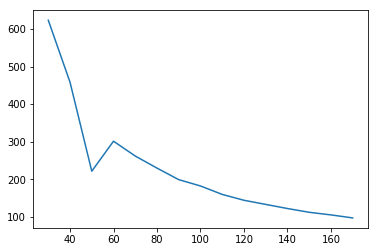

In [164]:
zeta = sim_diff.poles['corr_0']/sim_rand.poles['corr_0']
plt.plot(r_edges[:-1],zeta[2,])